# Type Annotations 

## dictionaries = data structures in python { "name ": "avengers ", "year":2019} allows for efficient data retrival based on unique keys but theres a problem with dictionaries which is it doesnt check if the data is correct type or structure 

here comes 

## Typed Dictionaries  = we explicitly define what the data structures are reducing runtime errors , this in fact makes debugging easier and makes code understandable

example :- 

from typing import TypedDict 

class Movie(TypedDict):
    name: str 
    year : int 

movie = Movie(name="avengers", year = 2019)


## Union : union lets you say that a value can be more than one type , flexible and easy to code , type safety as it can provide hints to help catch incorrect usage 

from typing import Union 

def square ( x: Union[int,float])-> float;
    return x*x  


so here x can be both int and float 

## optional data type annotation 

from typing import Optional 

def nice(name:Optional[str])-> None:
    ##optional[str] with optional it could be str / None - it cant be int , bool 
    if name is None : 
        print("hello random ")

    else: 
        print (f"hey there {name}!")


## Any Data type Annotation - could be any data structure 

def print_value (x:any ) : 
    print ( x ) 

print value ( "i am batman ")

 
# lambda Function : shortcut to writing small functions 

square = lambda x:x*x 

nums = [1,2,3,4]

squares = list ( map (lambda x:x*x , nums ))






# Elements In Langgraph 


## 0. Start 

### this is a node that is a virtual entry point in langgraph marking where the workflow begins , it doesnt perform but serves as designated starting position for graph's execution  


## 1. State :

### the state is a shared data structure that holds current information or context of entire application , simply put it is like application's memory which is keeping track of variables , data that nodes can acess and modify as they execute.  state shows us updated context of entire application

## 2. Nodes :

### nodes are individual functions or operations that perform specific tasks within graph - here each node recieves input procesess it and produces an output or an updated state  

### analogy - assembly line stations each station does one job , attach a part , paint it m inspect it , so on meaning to say that each node is absolutely like a individual operations that perform specific tasks 


## 3. Graph 

### Graph is overarching structure that maps out how different tasks ( nodes ) are connected and executed , it visually represents the workflow , showing sequence and conditional paths between barious operations 

## 4. Edges 

### Edges are connections between nodes that determines the flow of execution , they tell us which node should be executed next after current one completes its task 

### conditional Edges :- specialised connections that decide the next node to execute based on specific conditions or logic applied to current state   


## 5. End 

### end node signifies the conclusion of the workflow in langgraph 



## Tools  

### specialised functions that nodes can utilise to perform specific tasks such as fetching data from an api , they enhance capabilities of nodes , tools are functionalities used within nodes and nodes are part of graph  


## Tool Node 

### special node whose job is to run a tool , it connects tool's output back into state so other nodes can use that information 



## StateGraph **Very Important**

### a stategraph is a class in langgraph used to build and compile graph structure , it maanges nodes , edges and overall state , ensuring workflow operates in a unified way and data flows correctly between components   simply put its like a blueprint for a house that outlines the design and connections of buidling , a stategraph defines structure and flow of the workflow


## Runnable 

### a runnable in lg is a standardized executable component that performs a specific task within an ai workflow , serves as a fundamental buidling block, allowing for us to create modular systems , runnable can build sophisticated ai workflows 


 

# Messages in Langgraph 

# 1. Human Message : - requests input from a user  

# 2. System Message :- used to providing instructions or context to model 

# 3. Function Message :- Represents result of a function call 

# 4. AI Message :- Represents Responses generated by ai models 

# 5. Tool Message :- Similar to function message but specific to tool usage  

In [3]:
from typing import Dict, TypedDict 
from langgraph.graph import StateGraph

In [4]:
class AgentState(TypedDict):
    message:str 

def greeting_node(state : AgentState) -> AgentState: 
    """ simple node that adds a greeting message to the state"""

    state['message'] = "hey "+ state["message"] + ",  how's your day doing ?"

    return state 

In [5]:
graph = StateGraph(AgentState) 

graph.add_node("greeter", greeting_node)

graph.set_entry_point("greeter")
graph.set_finish_point("greeter")

app = graph.compile() #if it compiles , there might be logical errors  

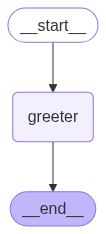

In [6]:
from IPython.display import Image, display 
display(Image(app.get_graph().draw_mermaid_png()))

In [7]:
 result = app.invoke({"message": "bob"})

 result["message"]

"hey bob,  how's your day doing ?"

In [8]:
 #june 17th 
 

In [17]:
class Agentstature(TypedDict):
    name:str 

def name_node(state: Agentstature) -> Agentstature:
    """ this is a node that gives compliments to the person """
    
    state["name"]= state["name"]+ " you are doing an incredible job by learning langgraph" 

    return state 




In [18]:
graph1 = StateGraph(Agentstature)

graph1.add_node("nameboi", name_node)

graph1.set_entry_point("nameboi")
graph1.set_finish_point("nameboi")

app = graph1.compile()


In [19]:
result1 = app.invoke ({"name": "Sathvik"})

result1["name"]

'Sathvik you are doing an incredible job by learning langgraph'